# Visualizing Data

Visualizing data with pandas is often done in conjunction with other libraries such as Matplotlib or Seaborn. Pandas provides some built-in plotting functionalities that utilize Matplotlib under the hood, making it easy to create basic visualizations directly from DataFrame or Series objects.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
path = r"C:\Users\Alysson\Documents\GitHub\Pandas-in-Python\database.xlsx"
data = pd.read_excel(path)

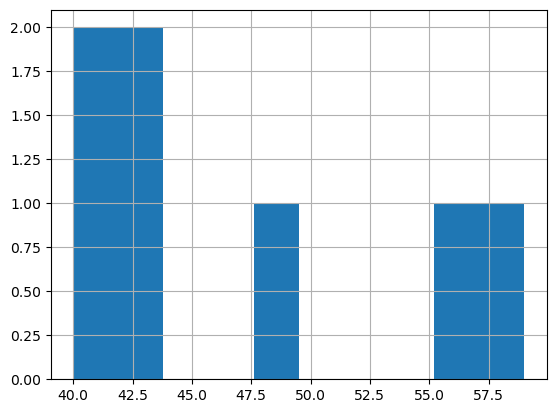

In [30]:
data["height_cm"].hist()
plt.show()

<Axes: >

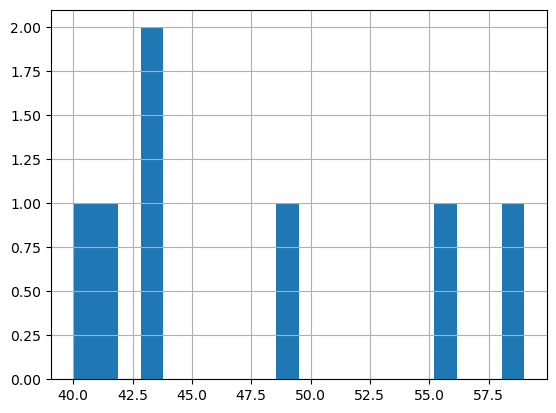

In [31]:
data["height_cm"].hist(bins=20)

In [32]:
data_by_breed = data.groupby("breed")["weight_kg"].mean()
data_by_breed

breed
King Cavalier    20.5
Korg             23.0
Labrador         27.0
Poodle           22.0
Schnauzer        23.0
Name: weight_kg, dtype: float64

<Axes: title={'center': 'Mean Weight'}, xlabel='breed'>

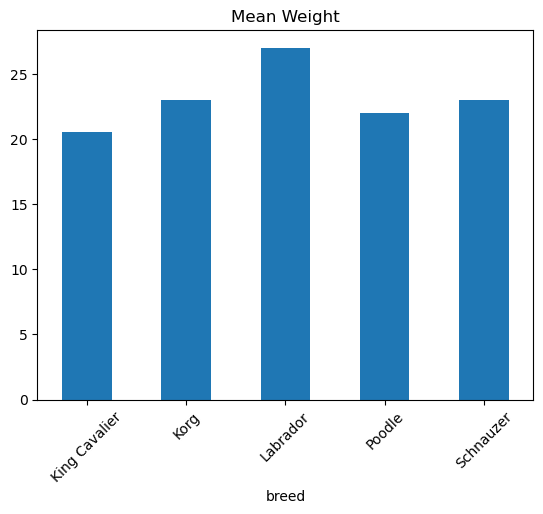

In [33]:
data_by_breed.plot(kind="bar",title="Mean Weight",rot = 45)

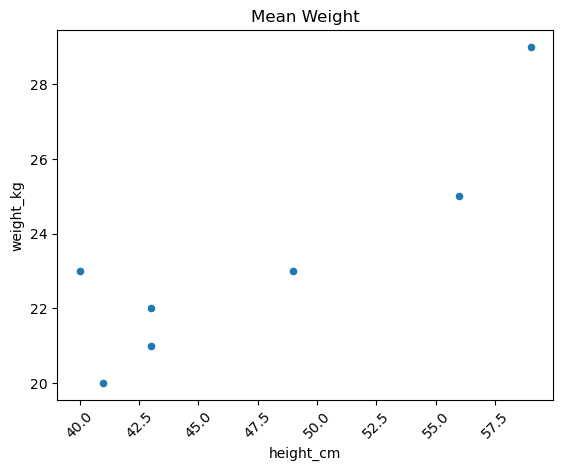

In [34]:
data.plot(kind="scatter",y = "weight_kg", x= "height_cm",title="Mean Weight",rot = 45)
plt.show()

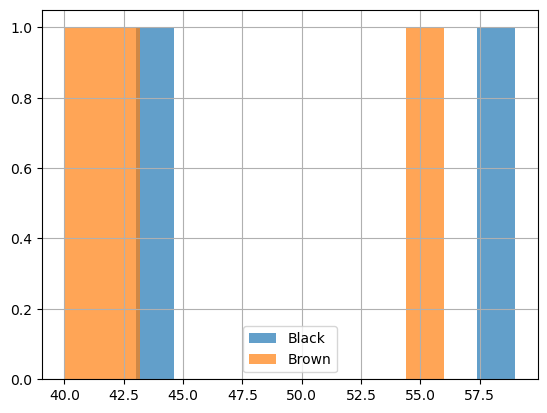

In [35]:
data[data["color"]=="Black"]["height_cm"].hist(alpha=0.7)
data[data["color"]=="Brown"]["height_cm"].hist(alpha=0.7)
plt.legend(["Black","Brown"])
plt.show()

## Missing Values

In [46]:
data_pivot = data.pivot_table("weight_kg", index = "breed",columns="color")

In [47]:
data_pivot

color,Black,Brown,Gray,White
breed,,,,
King Cavalier,NaN,21.0,NaN,20.0
Korg,NaN,23.0,NaN,NaN
Labrador,29.0,25.0,NaN,NaN
Poodle,22.0,NaN,NaN,NaN
Schnauzer,NaN,NaN,23.0,NaN


In [48]:
data_pivot.isna()

color,Black,Brown,Gray,White
breed,,,,
King Cavalier,True,False,True,False
Korg,True,False,True,True
Labrador,False,False,True,True
Poodle,False,True,True,True
Schnauzer,True,True,False,True


In [49]:
data_pivot.isna().any()

color
Black    True
Brown    True
Gray     True
White    True
dtype: bool

In [50]:
data_pivot.isna().sum()

color
Black    3
Brown    2
Gray     4
White    4
dtype: int64

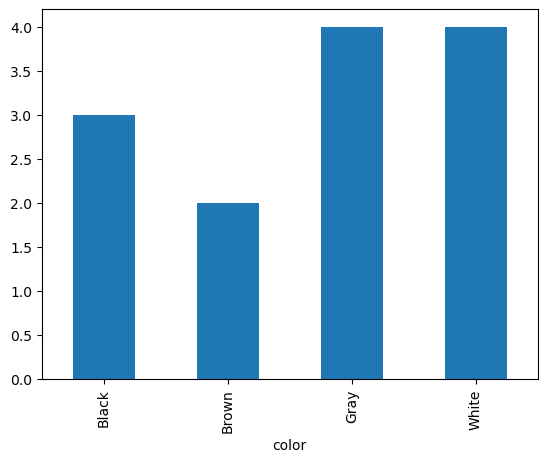

In [52]:
data_pivot.isna().sum().plot(kind="bar")
plt.show()

In [54]:
data_pivot.fillna(0)

color,Black,Brown,Gray,White
breed,,,,
King Cavalier,0.0,21.0,0.0,20.0
Korg,0.0,23.0,0.0,0.0
Labrador,29.0,25.0,0.0,0.0
Poodle,22.0,0.0,0.0,0.0
Schnauzer,0.0,0.0,23.0,0.0


In [55]:
data_pivot.dropna()

color,Black,Brown,Gray,White
breed,,,,


## Creating DataFrames

In [56]:
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, 	"large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, 	"large_sold": 8561348},
]


In [58]:
avocados_2019 = pd.DataFrame(avocados_list)
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


In [59]:
avocados_2019.to_csv("avocados_2019.csv")